In [114]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
restaurant_df = pd.read_csv('../Restaurants_in_LA.csv')

Lowercasing values under city

In [116]:
restaurant_df.loc[:,'CITY'].value_counts() #we can see some errors with capitalizations

LOS ANGELES         4075
Los Angeles          246
VAN NUYS             230
NORTH HOLLYWOOD      189
NORTHRIDGE           187
                    ... 
LAWNDALE               1
VENTURA                1
FALLBROOK              1
Tujunga                1
Westlake Village       1
Name: CITY, Length: 184, dtype: int64

In [117]:
#lowercasing all values under string column
restaurant_df['CITY'] = restaurant_df.loc[:,'CITY'].str.lower()

Lowercase column names

In [118]:
#lowercase column names
restaurant_df.columns = restaurant_df.columns.str.lower().tolist()

restaurant_df.columns

Index(['location account #', 'business name', 'dba name', 'street address',
       'city', 'location description', 'mailing address', 'mailing city',
       'mailing zip code', 'naics', 'primary naics description',
       'council district', 'location start date', 'location end date',
       'location'],
      dtype='object')

Get zip code from Location Description column

In [119]:
LA_addies = restaurant_df.loc[:,'location description'].tolist()

LA_zipCodes = []

for s in LA_addies:
    x = re.findall(' (\d+)',s)
    
    if len(x) > 1:
        LA_zipCodes.append(x[1])
    elif len(x) ==1:
        LA_zipCodes.append(x[0])
    else:
        LA_zipCodes.append(x)
    
restaurant_df['zip_code'] = LA_zipCodes



In [120]:
len(restaurant_df.loc[restaurant_df['zip_code'].str.len() != 5]['zip_code'])

# 7 rows have invalid zip codes

7

In [121]:
# keep only valid zipcodes (zipcodes with length of 5)
restaurant_df_mod1 = restaurant_df.loc[restaurant_df['zip_code'].str.len() == 5]
len(restaurant_df_mod1)

7274

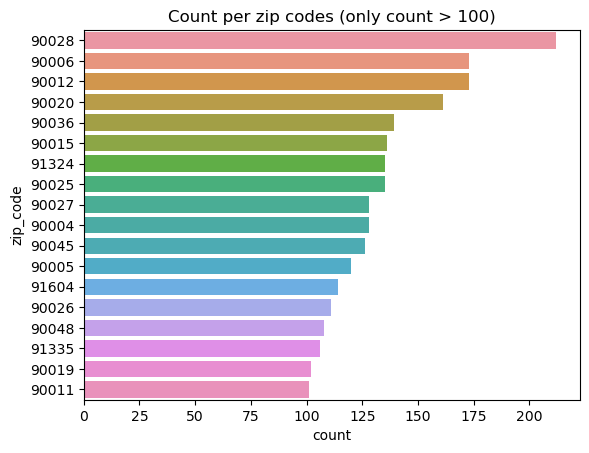

In [122]:
fig, ax = plt.subplots(nrows=1,ncols=1)

#getting a list of all zip codes and their count
zip_code_count = pd.DataFrame(restaurant_df_mod1.loc[:,'zip_code'].value_counts()
                              ).reset_index()

zip_code_count.columns = ['zip_code','count']

sns.barplot(y = 'zip_code',
            x = 'count',
            data = zip_code_count.loc[zip_code_count['count'] > 100]
            ).set(title='Count per zip codes (only count > 100)')
plt.show()



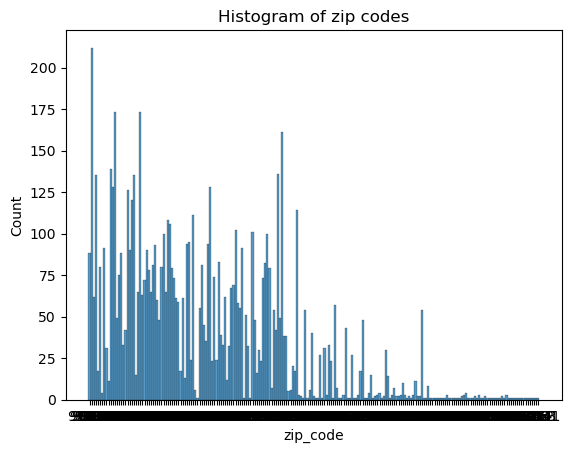

In [123]:
sns.histplot(data = restaurant_df_mod1,
             x = 'zip_code'
             ).set(title = 'Histogram of zip codes')
plt.show()